# Product Sales & Reviews Analysis - Video Games

## Imports

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [169]:
df = pd.read_csv("vgsales-12-4-2019-short.csv", index_col=0) 

## Data Exploration

In [170]:
df.shape

(55792, 15)

In [171]:
df.head(5)

,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
Rank,,,,,,,,,,,,,,,
1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


In [260]:
df.describe()

,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
count,6315.000000,265.000000,1620.000000,18072.000000,12230.000000,12654.000000,6333.000000,14567.000000,44455.000000
mean,7.192858,8.305283,1.771562,0.367835,0.274588,0.155352,0.102665,0.045927,2007.551591
std,1.450792,1.379246,4.091198,0.836877,0.510786,0.395386,0.167573,0.130342,5.489966
min,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1996.000000
25%,6.400000,7.900000,0.200000,0.030000,0.050000,0.010000,0.020000,0.000000,2003.000000
50%,7.500000,8.600000,0.520000,0.120000,0.120000,0.040000,0.040000,0.010000,2008.000000
75%,8.200000,9.300000,1.680000,0.370000,0.290000,0.140000,0.120000,0.040000,2011.000000
max,10.000000,10.000000,82.860000,20.320000,9.760000,9.850000,2.690000,3.120000,2017.000000


In [172]:
# Check missing data
df.isnull().sum()

Name                 0
Genre                0
ESRB_Rating      32169
Platform             0
Publisher            0
Developer           17
Critic_Score     49256
User_Score       55457
Total_Shipped    53965
Global_Sales     36377
NA_Sales         42828
PAL_Sales        42603
JP_Sales         48749
Other_Sales      40270
Year               979
dtype: int64

In [173]:
# Drop data where year is null
df = df.dropna(subset=['Year'])

In [174]:
# Change Year column to integer

df['Year'] = df['Year'].astype(int)

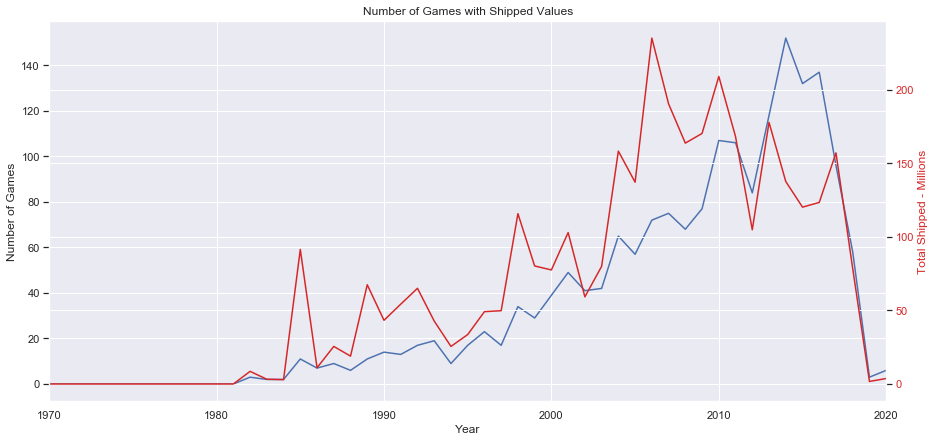

In [175]:
# Visualise - Number of games with shipped values

fig, ax1 = plt.subplots(figsize=(15,7))
df.groupby('Year')['Total_Shipped'].count().plot(ax=ax1)
ax1.set_title('Number of Games with Shipped Values')
ax1.set_ylabel('Number of Games')

ax2 = ax1.twinx()
color = 'tab:red'
df.groupby('Year')['Total_Shipped'].sum().plot(ax=ax2, color = color)
ax2.set_ylabel('Total Shipped - Millions', color = color)
ax2.tick_params(axis='y', labelcolor=color)
None

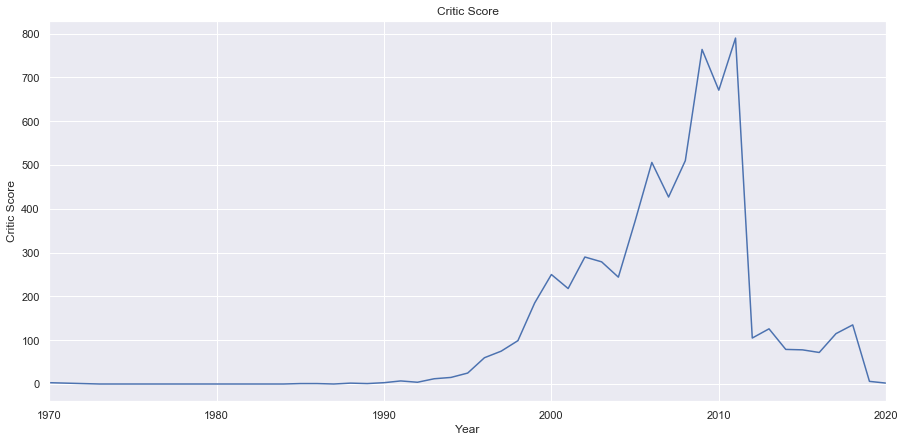

In [176]:
# Visualise - Critic_Score

fig, ax1 = plt.subplots(figsize=(15,7))
df.groupby('Year')['Critic_Score'].count().plot(ax=ax1)
ax1.set_title('Critic Score')
ax1.set_ylabel('Critic Score')
None

## Data Cleaning

### Only keep data from release date of 1995 which is more relevant to analysis and cut 2019 on data which is not complete

In [177]:
df = df[(df['Year'] >= 1996) & (df['Year'] < 2018)]

In [178]:
### Remove data with no shipments
# df = df.dropna(subset = ['Total_Shipped'])

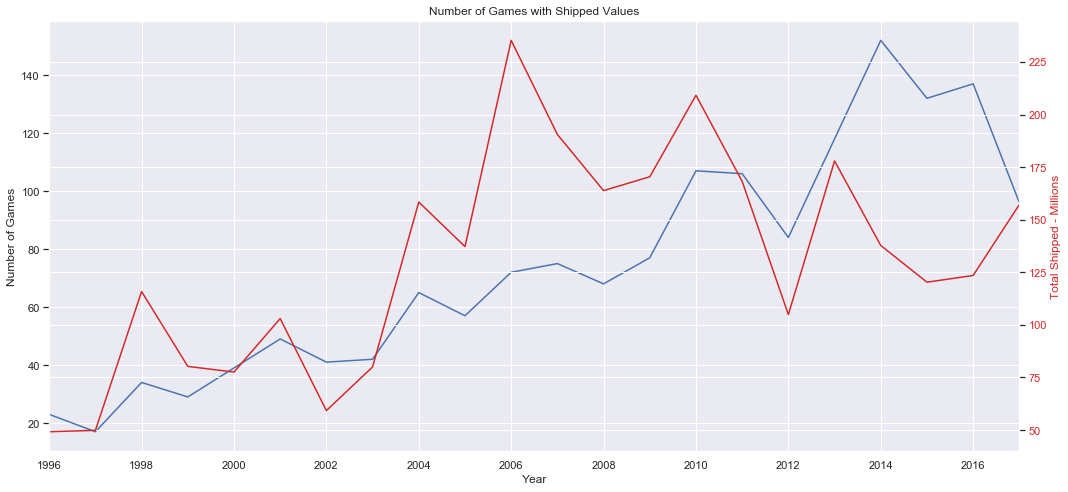

In [179]:
# Visualise - After Clearning - Number of games with shipped values

fig, ax1 = plt.subplots(figsize=(15,7))
df.groupby('Year')['Total_Shipped'].count().plot(ax=ax1)
ax1.set_title('Number of Games with Shipped Values')
ax1.set_ylabel('Number of Games')
ax1.locator_params(integer=True)
ax1.axes.set_xticks(np.arange(1996, 2017, 2))

ax2 = ax1.twinx()
color = 'tab:red'
df.groupby('Year')['Total_Shipped'].sum().plot(ax=ax2, color = color)
ax2.set_ylabel('Total Shipped - Millions', color = color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
None

## Analysis - From 2010 which platforms perform best by Shipped Volume?

In [180]:
df2 = df[df['Year'] >= 2010]

In [181]:
platform_summary = df2.groupby(['Platform'])['Total_Shipped'].sum().sort_values()
platform_summary = platform_summary.reset_index()
platform_summary.tail(10)

,Platform,Total_Shipped
36,XOne,16.87
37,PS3,39.77
38,PS4,48.41
39,X360,50.45
40,Wii,52.96
41,NS,57.38
42,WiiU,60.03
43,DS,63.47
44,3DS,230.56
45,PC,568.26


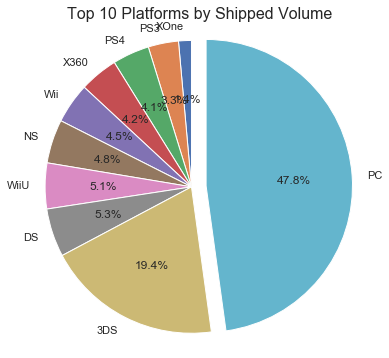

In [189]:
labels = platform_summary.tail(10)['Platform']
sizes = platform_summary.tail(10)['Total_Shipped']
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Platforms by Shipped Volume', size = 16)

plt.show()

## Analysis - From 2010 which platforms perform best by Global Sales?

In [183]:
platform_sales_summary = df2.groupby(['Platform'])['Global_Sales'].sum().sort_values()
platform_sales_summary = platform_sales_summary.reset_index()
platform_sales_summary.tail(10)

,Platform,Global_Sales
36,PSP,58.66
37,PSV,63.89
38,PC,96.66
39,DS,101.86
40,3DS,113.01
41,Wii,183.99
42,XOne,239.74
43,PS4,485.91
44,X360,517.57
45,PS3,585.16


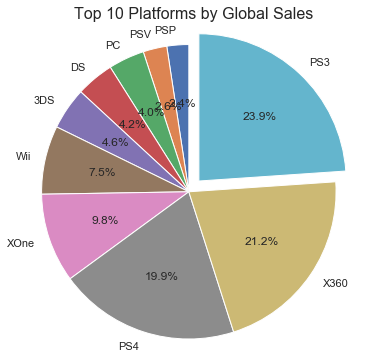

In [190]:
labels = platform_sales_summary.tail(10)['Platform']
sizes = platform_sales_summary.tail(10)['Global_Sales']
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Platforms by Global Sales', size = 16)

plt.show()

## Analysis - Which platform is best by unit sales price

In [209]:
platform_combined = platform_summary.join(platform_sales_summary.set_index('Platform'), on='Platform')
platform_combined['Average_Sale'] = platform_combined['Global_Sales'] / platform_combined['Total_Shipped']
platform_combined.tail(10)

,Platform,Total_Shipped,Global_Sales,Average_Sale
36,XOne,16.87,239.74,14.211025
37,PS3,39.77,585.16,14.713603
38,PS4,48.41,485.91,10.037389
39,X360,50.45,517.57,10.259068
40,Wii,52.96,183.99,3.474131
41,NS,57.38,20.17,0.351516
42,WiiU,60.03,37.44,0.623688
43,DS,63.47,101.86,1.604853
44,3DS,230.56,113.01,0.490154
45,PC,568.26,96.66,0.170098


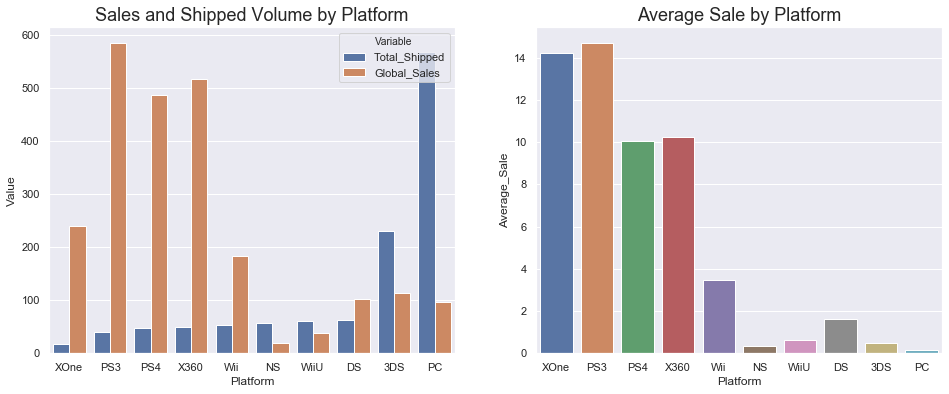

In [450]:
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))
tidy = platform_combined[['Platform', 'Total_Shipped', 'Global_Sales']].tail(10).melt(id_vars=['Platform']).rename(columns=str.title)
sns.barplot(x='Platform', y='Value', hue='Variable', data=tidy, ax=ax1)
ax1.set_title('Sales and Shipped Volume by Platform', size=18)
sns.despine(fig)

sns.barplot(x='Platform', y='Average_Sale',data=platform_combined.tail(10), ax=ax2)
ax2.set_title('Average Sale by Platform', size=18)
sns.despine(fig)

### Findings

Based on unit sales price alone, Xbox and Playstation console appear to have the highest unit sales price and therefore would be good to target for game development. However, you would also want to look at cost data which is unavailable for this analysis.

## Analysis - Does Critic Score correlate to Sales

In [279]:
averagescore = df2.dropna(subset=['Critic_Score'])
averagescore = averagescore.groupby('Platform')['Critic_Score'].mean().sort_values().reset_index()

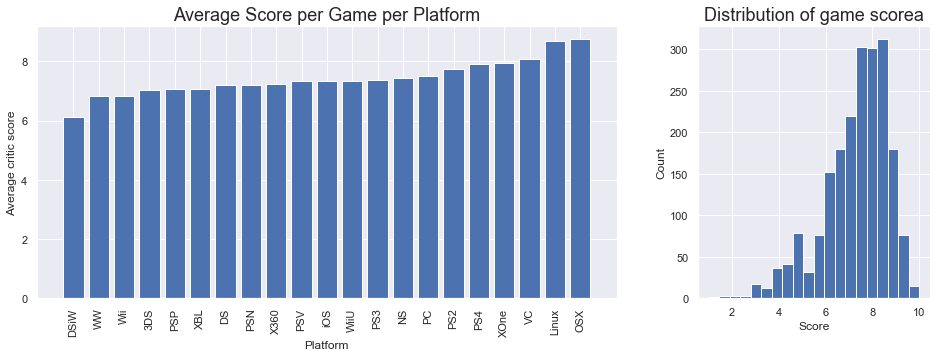

In [336]:
# Average score per game
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5), gridspec_kw={'width_ratios': [5, 2]})
ax1.bar(averagescore['Platform'], averagescore['Critic_Score'])
ax1.set_ylabel('Average critic score')
ax1.set_xlabel('Platform')
ax1.set_xticklabels(labels=averagescore['Platform'], rotation=90)
ax1.set_title('Average Score per Game per Platform', size=18)

# Distribution of game scores
ax2.hist(df2['Critic_Score'],bins = 20)
ax2.set_title('Distribution of game scorea', size=18)
ax2.set_ylabel('Count')
ax2.set_xlabel('Score')
None

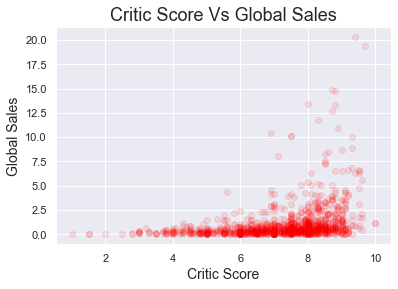

In [337]:
df_sales = df2.dropna(subset=['Global_Sales'])
plt.scatter(df_sales['Critic_Score'], df_sales['Global_Sales'], alpha=.1, color='red')
plt.title('Critic Score Vs Global Sales', fontsize=18)
plt.xlabel('Critic Score', fontsize=14)
plt.ylabel('Global Sales', fontsize=14)
plt.grid(True)
plt.show()

In [283]:
df_sales['Global_Sales'].corr(df_sales['Critic_Score'])

0.3158139974430761

### Findings

- Average score does not have too much variance between the top platforms with the majority of scores distriubted around 7 and 8.
- There appears to be some correlation between critic score and sales but not particuarly strong

## Defining the right measure for game success

Potential options:
- Total Shipments
- Global Sales
- Critic Score
- User Score
    
Findings:

- Critic score vs. User score:  Critic score is considered a better option as there are only a small number of user scores (306 vs. 5515). However with low variance it is likely not too useful for diffentiating success.

- Total Shipments: This measure available only for 5% of the data

- Global Sales: we have this measure available for 50% of the data

- Games have either total shipment or global sales data  -> the 2 attributes can be merged into 1 by looking at sales to shipment ratio


Conclusion:

- Rataio of Global Sales and Total Shipments to be used as main measure for success

# Overview of Top Games, Bottom Games and Middle Performing Games

## TOP 10% Units sold

In [444]:
print('Average Global Sales: ',df2['Global_Sales'].mean())

upper10percentsales = df2['Global_Sales'].quantile(0.90)
print('Upper 10 Percent cut off - Global Sales: ',upper10percentsales)

top10percent = df2[df2['Global_Sales'] > upper10percentsales]

Average Global Sales:  0.38289176829271965
Upper 10 Percent cut off - Global Sales:  0.86


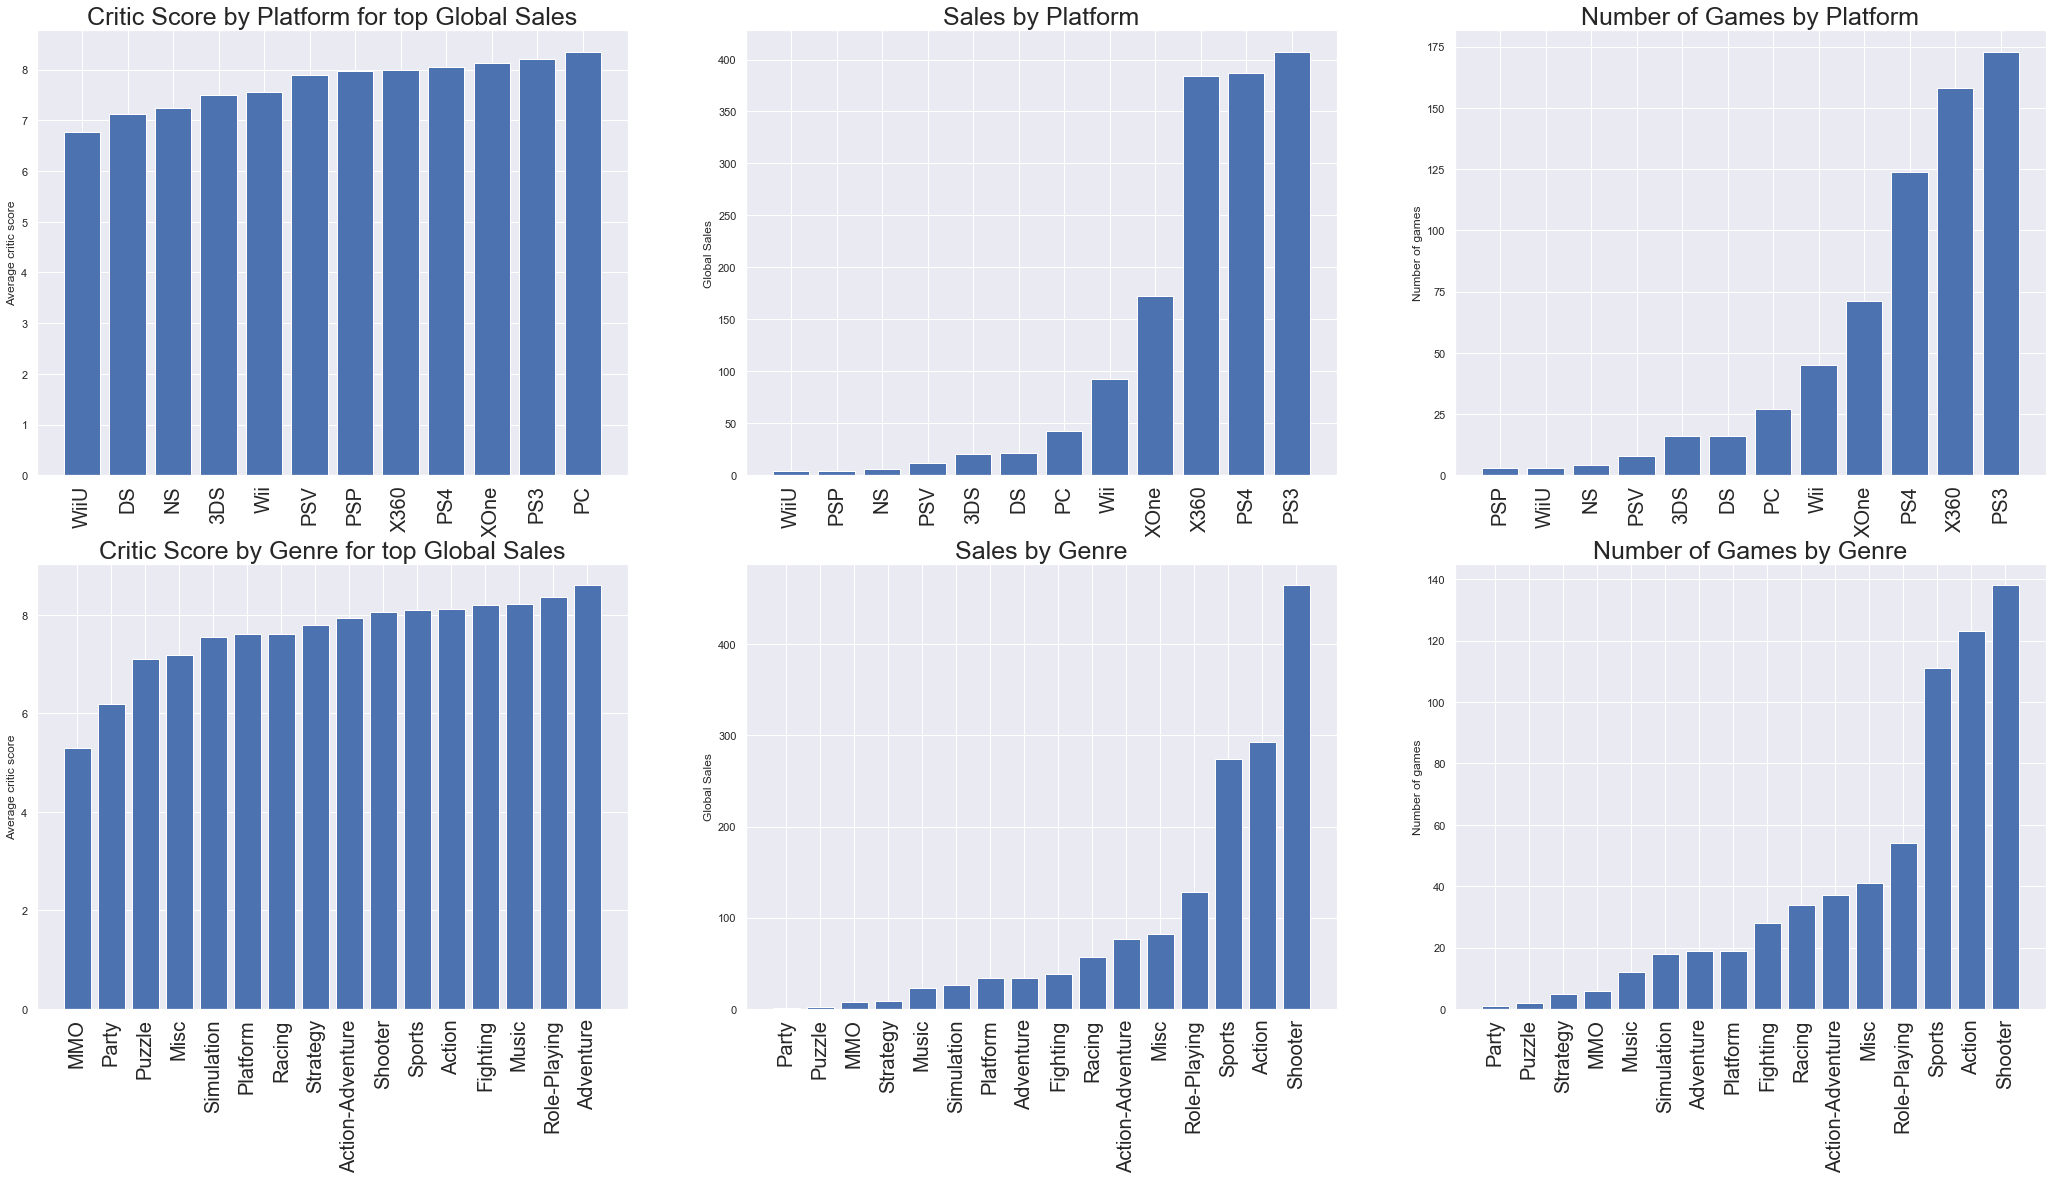

In [443]:
fix, ax = plt.subplots(2,3, figsize=(36,18))

averagescore1 = top10percent.groupby('Platform')['Critic_Score'].mean().sort_values().reset_index()
ax[0,0].bar(averagescore1['Platform'], averagescore1['Critic_Score'])
ax[0,0].set_ylabel('Average critic score')
#ax[0,0].set_xlabel('Platform')
ax[0,0].set_xticklabels(labels=averagescore1['Platform'], rotation=90, size=20)
ax[0,0].set_title('Critic Score by Platform for top Global Sales', size=25)

averagescore2 = top10percent.groupby('Genre')['Critic_Score'].mean().sort_values().reset_index()
ax[1,0].bar(averagescore2['Genre'], averagescore2['Critic_Score'])
ax[1,0].set_ylabel('Average critic score')
#ax[1,0].set_xlabel('Genre')
ax[1,0].set_xticklabels(labels=averagescore2['Genre'], rotation=90, size=20)
ax[1,0].set_title('Critic Score by Genre for top Global Sales', size=25)

top10percent2 = top10percent.groupby('Platform')['Global_Sales'].sum().sort_values().reset_index()
ax[0,1].bar(top10percent2['Platform'], top10percent2['Global_Sales'])
ax[0,1].set_ylabel('Global Sales')
#ax[0,1].set_xlabel('Platform')
ax[0,1].set_xticklabels(labels=top10percent2['Platform'], rotation=90, size=20)
ax[0,1].set_title('Sales by Platform', size=25)

top10percent3 = top10percent.groupby('Genre')['Global_Sales'].sum().sort_values().reset_index()
ax[1,1].bar(top10percent3['Genre'], top10percent3['Global_Sales'])
ax[1,1].set_ylabel('Global Sales')
#ax[1,1].set_xlabel('Genre')
ax[1,1].set_xticklabels(labels=top10percent3['Genre'],rotation=90, size=20)
ax[1,1].set_title('Sales by Genre', size=25)

top10percent4 = top10percent.groupby('Platform')['Name'].count().sort_values().reset_index()
ax[0,2].bar(top10percent4['Platform'], top10percent4['Name'])
ax[0,2].set_ylabel('Number of games')
#ax[0,2].set_xlabel('Platform')
ax[0,2].set_xticklabels(labels=top10percent4['Platform'], rotation=90, size=20)
ax[0,2].set_title('Number of Games by Platform', size=25)

top10percent5 = top10percent.groupby('Genre')['Name'].count().sort_values().reset_index()
ax[1,2].bar(top10percent5['Genre'], top10percent5['Name'])
ax[1,2].set_ylabel('Number of games')
#ax[1,2].set_xlabel('Genre')
ax[1,2].set_xticklabels(labels=top10percent5['Genre'], rotation=90, size=20)
ax[1,2].set_title('Number of Games by Genre', size=25)

plt.show()

### Findings:

Highest units sold:
- Top 3 Platforms: Wii, X-Box, Playstation
- Top 3 Genre: Shooter, Action, Sports

Highest number of games:
- Top 3 Platforms: Wii, X-Box, Playstation
- Top 3 Genre: Shooter, Action, Sports

Conclusion:
-  Shooter, Action and Sports games appear to be most succesful but also have most competition

## BOTTOM 20% Units sold

In [445]:
print('Average Global Sales: ',df2['Global_Sales'].mean())

bottom20percentsales = df2['Global_Sales'].quantile(0.20)
print('Bottom 20 Percent cut off - Global Sales: ',bottom20percentsales)

bottom10percent = df2[df2['Global_Sales'] < bottom20percentsales]

Average Global Sales:  0.38289176829271965
Bottom 20 Percent cut off - Global Sales:  0.020000000000000004


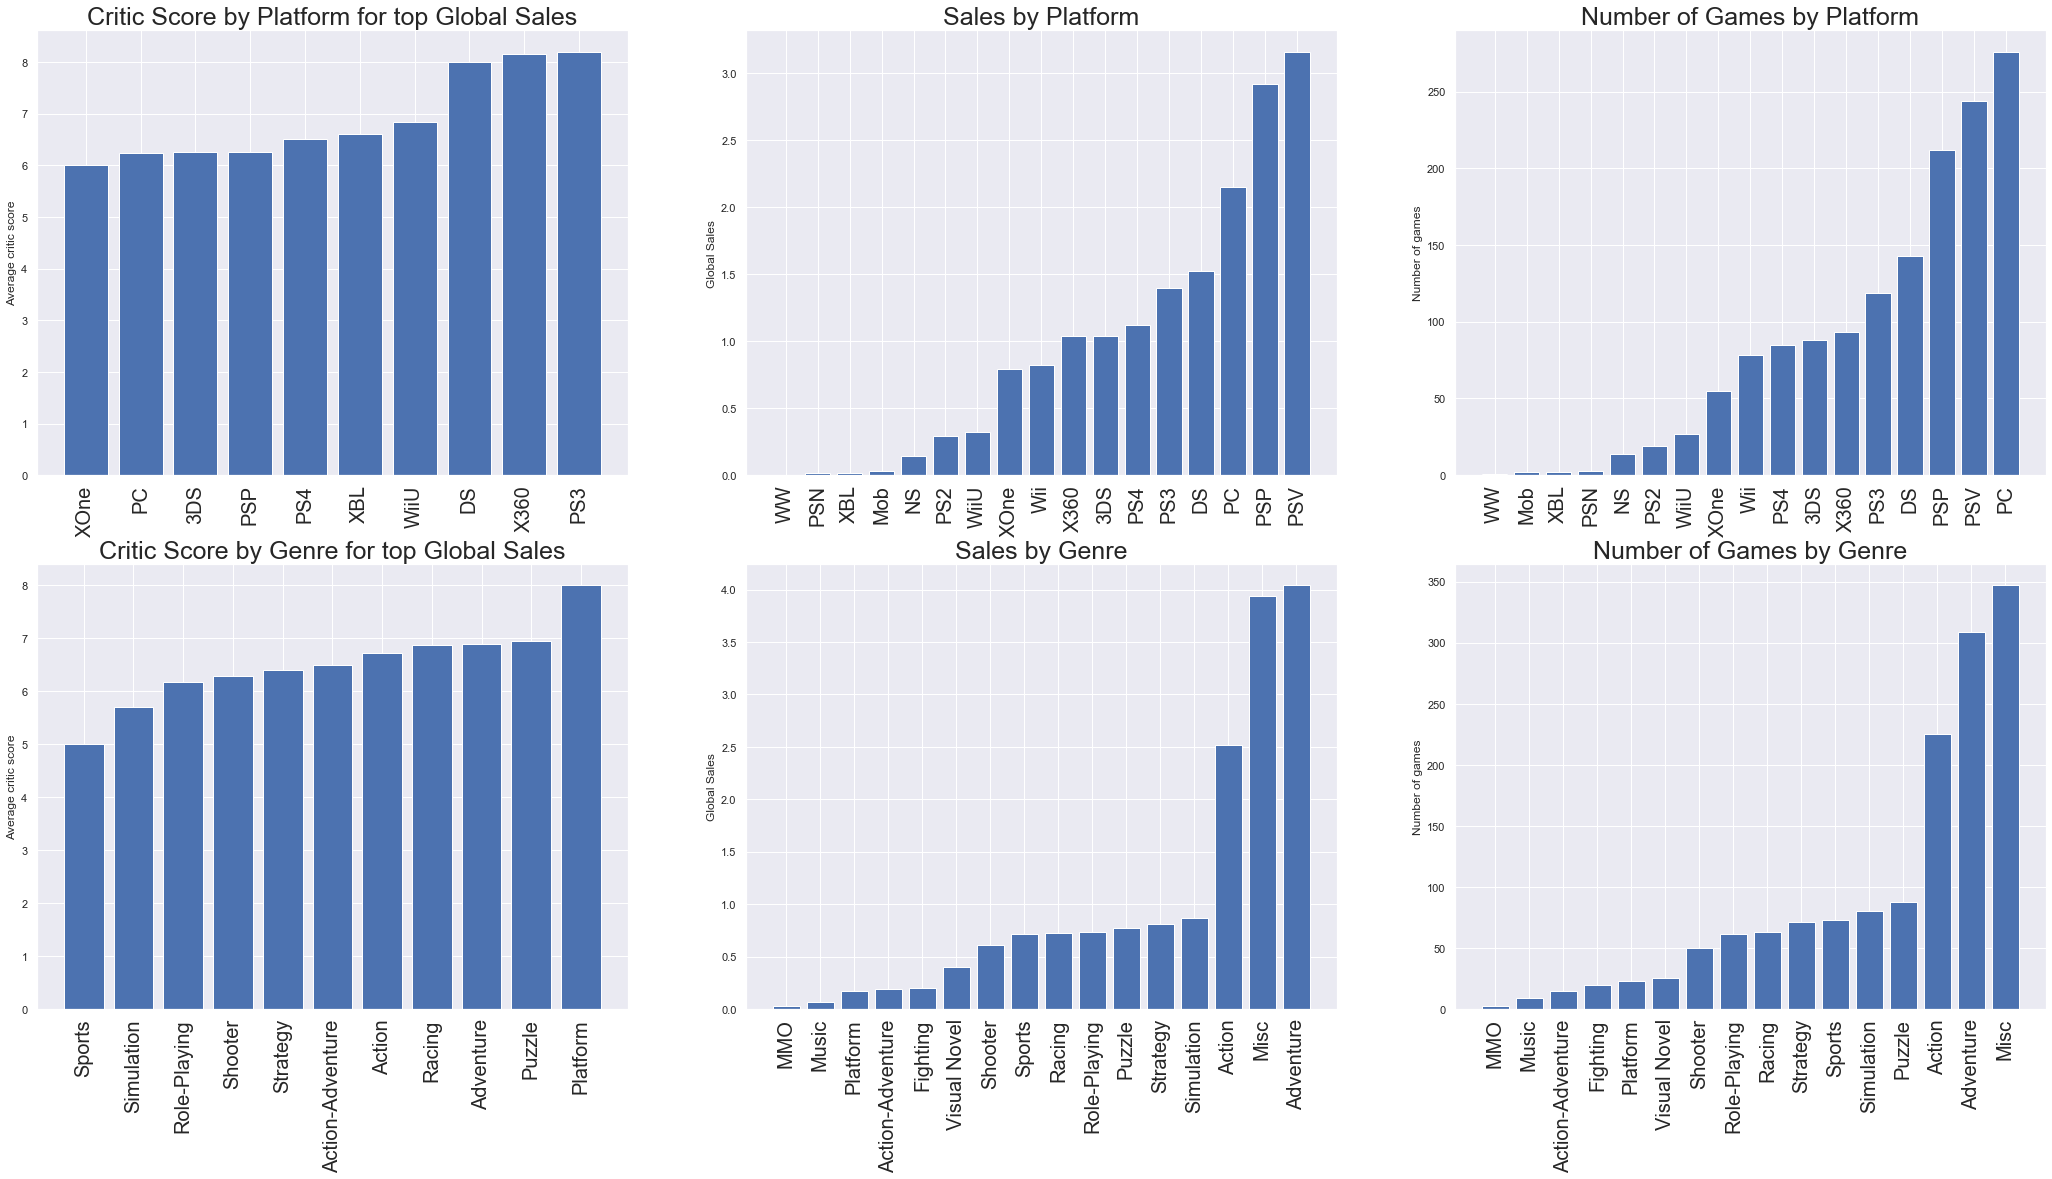

In [446]:
fix, ax = plt.subplots(2,3, figsize=(36,18))

averagescore1 = bottom10percent.groupby('Platform')['Critic_Score'].mean().sort_values().reset_index()
ax[0,0].bar(averagescore1['Platform'], averagescore1['Critic_Score'])
ax[0,0].set_ylabel('Average critic score')
#ax[0,0].set_xlabel('Platform')
ax[0,0].set_xticklabels(labels=averagescore1['Platform'], rotation=90, size=20)
ax[0,0].set_title('Critic Score by Platform for top Global Sales', size=25)

averagescore2 = bottom10percent.groupby('Genre')['Critic_Score'].mean().sort_values().reset_index()
ax[1,0].bar(averagescore2['Genre'], averagescore2['Critic_Score'])
ax[1,0].set_ylabel('Average critic score')
#ax[1,0].set_xlabel('Genre')
ax[1,0].set_xticklabels(labels=averagescore2['Genre'], rotation=90, size=20)
ax[1,0].set_title('Critic Score by Genre for top Global Sales', size=25)

percent1 = bottom10percent.groupby('Platform')['Global_Sales'].sum().sort_values().reset_index()
ax[0,1].bar(percent1['Platform'], percent1['Global_Sales'])
ax[0,1].set_ylabel('Global Sales')
#ax[0,1].set_xlabel('Platform')
ax[0,1].set_xticklabels(labels=percent1['Platform'], rotation=90, size=20)
ax[0,1].set_title('Sales by Platform', size=25)

percent2 = bottom10percent.groupby('Genre')['Global_Sales'].sum().sort_values().reset_index()
ax[1,1].bar(percent2['Genre'], percent2['Global_Sales'])
ax[1,1].set_ylabel('Global Sales')
#ax[1,1].set_xlabel('Genre')
ax[1,1].set_xticklabels(labels=percent2['Genre'],rotation=90, size=20)
ax[1,1].set_title('Sales by Genre', size=25)

percent3 = bottom10percent.groupby('Platform')['Name'].count().sort_values().reset_index()
ax[0,2].bar(percent3['Platform'], percent3['Name'])
ax[0,2].set_ylabel('Number of games')
#ax[0,2].set_xlabel('Platform')
ax[0,2].set_xticklabels(labels=percent3['Platform'], rotation=90, size=20)
ax[0,2].set_title('Number of Games by Platform', size=25)

percent4 = bottom10percent.groupby('Genre')['Name'].count().sort_values().reset_index()
ax[1,2].bar(percent4['Genre'], percent4['Name'])
ax[1,2].set_ylabel('Number of games')
#ax[1,2].set_xlabel('Genre')
ax[1,2].set_xticklabels(labels=percent4['Genre'], rotation=90, size=20)
ax[1,2].set_title('Number of Games by Genre', size=25)

plt.show()

### Findings:

Highest units sold:
- Top 3 Platforms: Playstation, PC and DS
- Top 3 Genre: Adventure, Misc, Simulation

Highest number of games:
- Top 3 Platforms: X360, PS2, PS3
- Top 3 Genre: Adventure, Misc, Simulation

## MIDDLE Section Units sold

In [448]:
middlepercent = df2[(df2['Global_Sales'] >= bottom20percentsales) & (df2['Global_Sales'] <= upper10percentsales)]

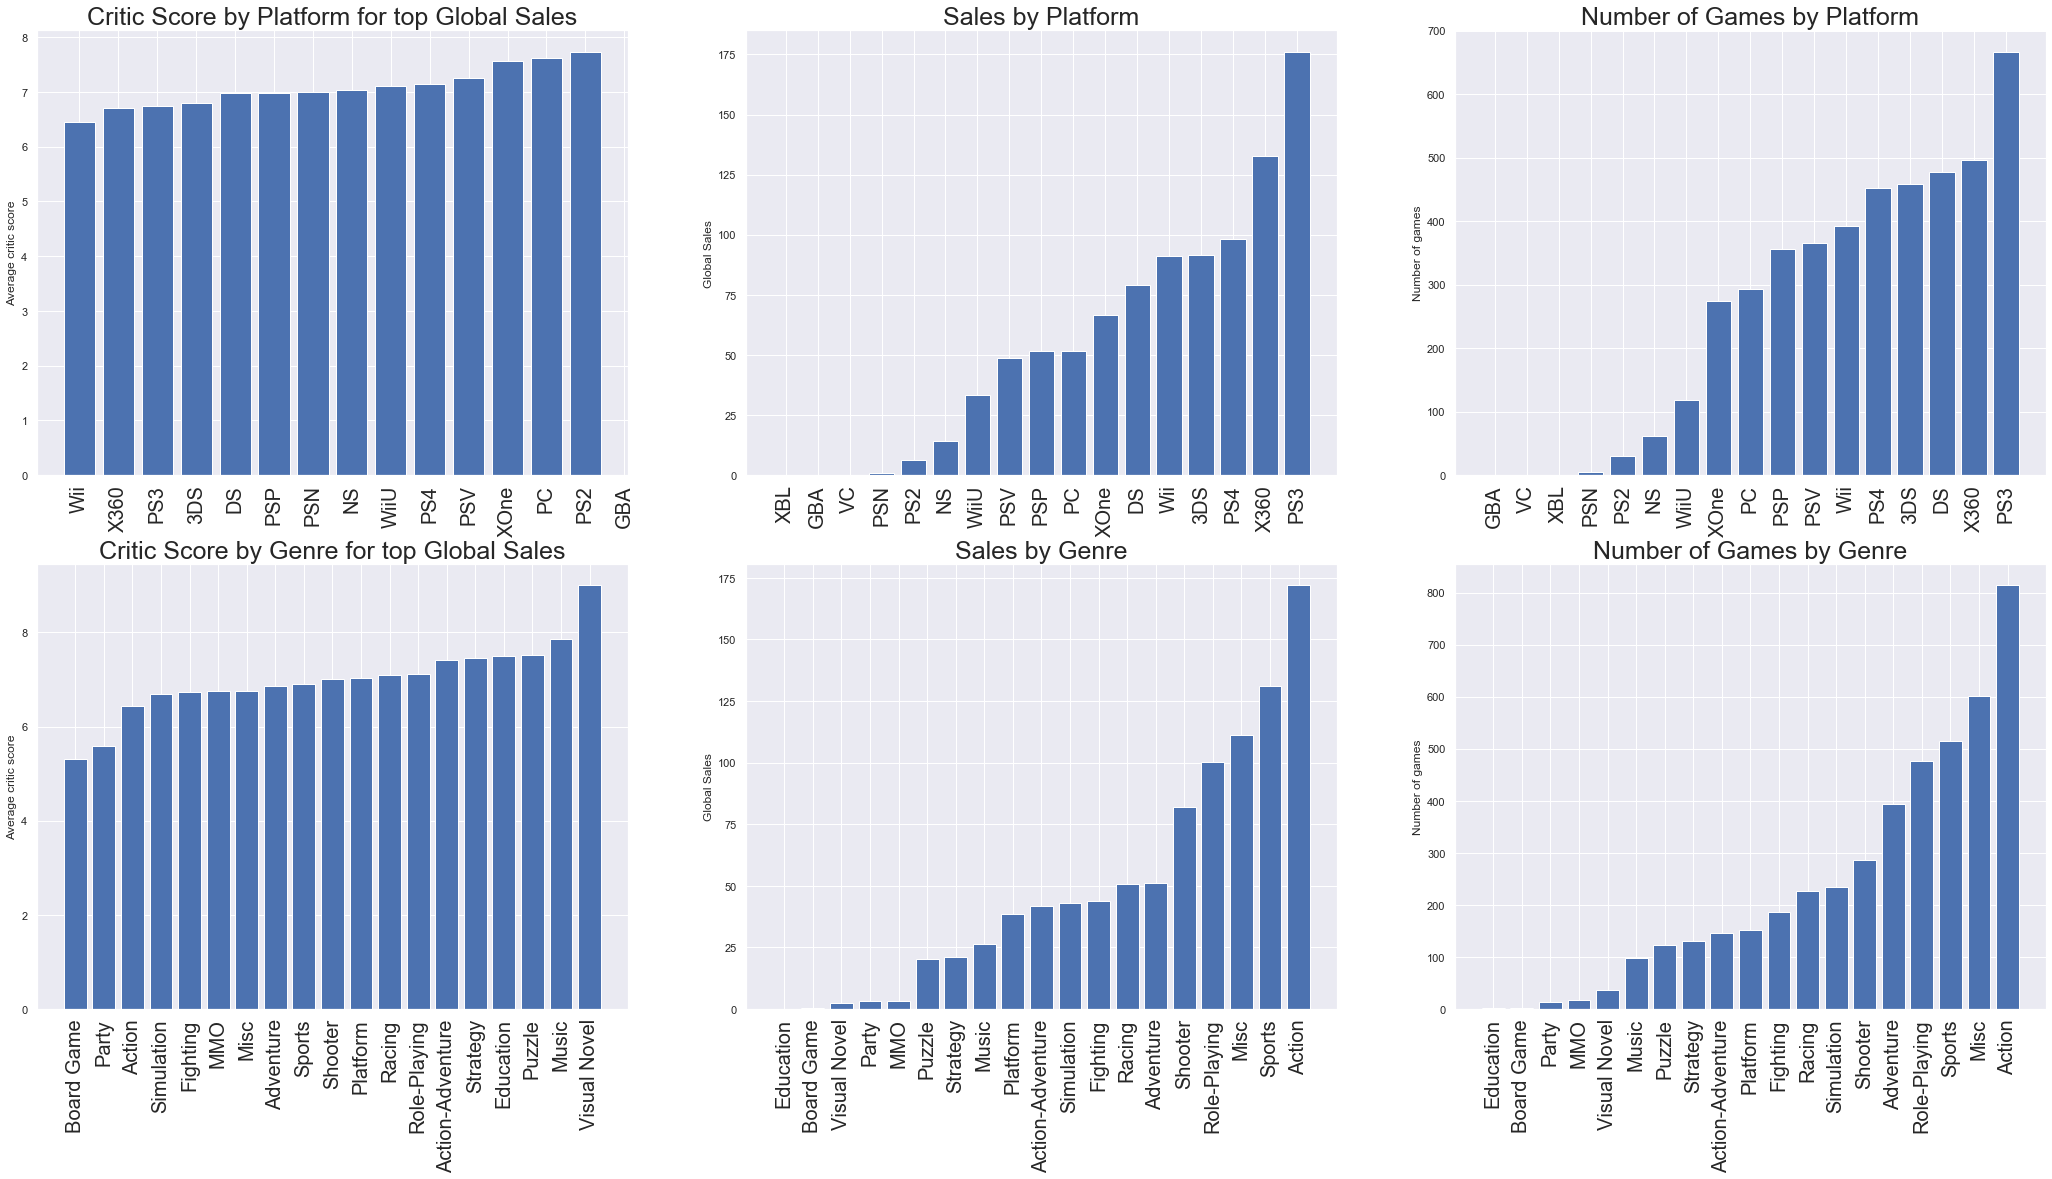

In [449]:
fix, ax = plt.subplots(2,3, figsize=(36,18))

averagescore1 = middlepercent.groupby('Platform')['Critic_Score'].mean().sort_values().reset_index()
ax[0,0].bar(averagescore1['Platform'], averagescore1['Critic_Score'])
ax[0,0].set_ylabel('Average critic score')
#ax[0,0].set_xlabel('Platform')
ax[0,0].set_xticklabels(labels=averagescore1['Platform'], rotation=90, size=20)
ax[0,0].set_title('Critic Score by Platform for top Global Sales', size=25)

averagescore2 = middlepercent.groupby('Genre')['Critic_Score'].mean().sort_values().reset_index()
ax[1,0].bar(averagescore2['Genre'], averagescore2['Critic_Score'])
ax[1,0].set_ylabel('Average critic score')
#ax[1,0].set_xlabel('Genre')
ax[1,0].set_xticklabels(labels=averagescore2['Genre'], rotation=90, size=20)
ax[1,0].set_title('Critic Score by Genre for top Global Sales', size=25)

percent1 = middlepercent.groupby('Platform')['Global_Sales'].sum().sort_values().reset_index()
ax[0,1].bar(percent1['Platform'], percent1['Global_Sales'])
ax[0,1].set_ylabel('Global Sales')
#ax[0,1].set_xlabel('Platform')
ax[0,1].set_xticklabels(labels=percent1['Platform'], rotation=90, size=20)
ax[0,1].set_title('Sales by Platform', size=25)

percent2 = middlepercent.groupby('Genre')['Global_Sales'].sum().sort_values().reset_index()
ax[1,1].bar(percent2['Genre'], percent2['Global_Sales'])
ax[1,1].set_ylabel('Global Sales')
#ax[1,1].set_xlabel('Genre')
ax[1,1].set_xticklabels(labels=percent2['Genre'],rotation=90, size=20)
ax[1,1].set_title('Sales by Genre', size=25)

percent3 = middlepercent.groupby('Platform')['Name'].count().sort_values().reset_index()
ax[0,2].bar(percent3['Platform'], percent3['Name'])
ax[0,2].set_ylabel('Number of games')
#ax[0,2].set_xlabel('Platform')
ax[0,2].set_xticklabels(labels=percent3['Platform'], rotation=90, size=20)
ax[0,2].set_title('Number of Games by Platform', size=25)

percent4 = middlepercent.groupby('Genre')['Name'].count().sort_values().reset_index()
ax[1,2].bar(percent4['Genre'], percent4['Name'])
ax[1,2].set_ylabel('Number of games')
#ax[1,2].set_xlabel('Genre')
ax[1,2].set_xticklabels(labels=percent4['Genre'], rotation=90, size=20)
ax[1,2].set_title('Number of Games by Genre', size=25)

plt.show()

# Conclusion

- Based on the data Shooter, Action or Sports Games would be a good focus for development budget with these games performing well in sales and volume
- The best platforms for a high average sales rate are Xbox and Playstation